# Identifying EEG-based Correlations for Prediction of Psychiatric Disorders

# Link to Presentation:
https://drive.google.com/file/d/1563SnNlwx7gG5UFFAeMfHDhBJViPx72W/view?usp=drive_link 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Names

* Sharai Barrera // A15889783
* Kashika Rathore // A16137930
* Varsha Sampath // A16294875
* Sarita Raghunath // A16425750
* Jahnavi Handral // A16503456

# Overview

* Using EEG data sourced from various studies, we attempted to determine if we can show whether or not EEG data can show whether or not a patient has a psychiatric disorder, particularly ADHD or schizophrenia. We analyzed data from five electrodes and visualized the raw average EEG for both types of patients to see if there were any perceptible differences in the brain waves. We then conducted a fourier transform to do a power spectrum analysis to see which channels recorded the highest powers. We generally found that both patients, and schizophrenic patients in particular, had higher power at lower frequencies like the delta and theta waves. We also created a model which utilized the EEG recordings to predict whether the patient has either schizophrenia or ADHD using both a support vector machine and random forest classifier, finding that the RF classifier was significantly more effective at accurately predicting between the two categories.

<a id='research_question'></a>
# Research Question

Using pre-processed EEG datasets that reflect psychiatric disorders (specifically Schizophrenia & ADHD), how can we detect correlations/distinctions (biomarkers, electrodes, etc.) which signify the presence of a disorder, to aid in the development of diagnostic models and its prediction likelihood?

<a id='background'></a>

## Background & Prior Work

Those that suffer psychiatric disorders have affected behaviors and thoughts in their day to day life. Diagnosing patients with one psychiatric disorder is not a simple task, many symptoms overlap across different disorders. Without an adequate model for diagnosis, patients suffer the consequence of not receiving the right treatment or in a timely manner[^Strauss]. An alternative diagnostic approach would be to use neuroimaging such as EEG, but we are faced with the same problem of overlap across disorders. If individual EEG studies don’t show unique distinctions between patients with varying psychiatric illnesses and healthy individuals then perhaps looking at EEG data across hundreds of studies may tell us something.

Previous work has suggested that different frequency bands of resting-state brain oscillations, such as alpha and theta bands, can serve as predictors of cognitive function in psychiatric disorders - higher alpha and theta power is correlated with improved cognitive function [^Sargent] . Other work has also touched on how EEG is a useful tool for detecting psychiatric disorders, showing that people with schizophrenia have increased beta power and reduced alpha power levels, combined with irregular eye saccades [^Badrakalimuthu] . This study also found that patients with other conditions - Mania, Depression, Anxiety, and other affective disorders had certain neural/EEG markers, such as overly high alpha activity, or increase in theta and delta activity in certain areas of the brain. 

EEG data at resting state across many studies show a negative linear relationship between frequencies and power in patients with ADHD, OCD, and Schizophrenia; while there is no relationship for those with PTSD, addiction, and Autism [^Newson]. The higher frequencies known as Gamma, Alpha, and Beta bands appear at lower powers while the lower frequencies, Delta and Theta bands, appear at higher powers. Our project will like to expand on this negative linear relationship found between ADHD, OCD, Schizophrenia by looking for more datasets aiming to find some distinctions. 

[^Newson]: Newson, J. J., &amp; Thiagarajan, T. C. (2019). EEG frequency bands in psychiatric disorders: A review of Resting State Studies. Frontiers in Human Neuroscience, 12. 
https://www.frontiersin.org/articles/10.3389/fnhum.2018.00521/full

[^Strauss]: Strauss JS. Diagnostic Models and the Nature of Psychiatric Disorder. Arch Gen Psychiatry. 1973;29(4):445–449. 
https://jamanetwork.com/journals/jamapsychiatry/fullarticle/490988

[^Sargent]: Sargent, K., Chavez-Baldini, U., Master, S. L., Verweij, K. J. H., Lok, A., Sutterland, A. L., Vulink, N. C., Denys, D., Smit, D. J. A., & Nieman, D. H. (2021). Resting-state brain oscillations predict cognitive function in psychiatric disorders: A transdiagnostic machine learning approach. Journal of Affective Disorders. 
https://www.sciencedirect.com/science/article/pii/S2213158221000619

[^Badrakalimuthu]: Badrakalimuthu, V., Swamiraju, R., & De Waal, H. (2011). EEG in psychiatric practice: To do or not to do? Advances in Psychiatric Treatment, 17(2), 114-121. 
https://www.cambridge.org/core/journals/advances-in-psychiatric-treatment/article/eeg-in-psychiatric-practice-to-do-or-not-to-do/F671BE17183176E364A2C2578B2DDD61#:~:text=The%20application%20of%20EEG%20in,functional%20symptoms%20and%20organic%20aetiology.


# Hypothesis


Utilizing resting state EEG recordings, we believe distinct EEG markers, such as increased delta power/ reduced alpha power and modified connectivity within attention-related networks, will result in higher accuracy for distinguishing ADHD from those with schizophrenia. We believe that the patterns of attentional deficits reflected in ADHD, resulting from impaired coordination amongst brain regions, are specific enough to develop a more precise model. 

# Dataset(s)

* Dataset Name:  A Dataset of EEG Signals from Adults with ADHD and Healthy Controls: Resting State, Cognitive function, and Sound Listening Paradigm
* Link to the dataset: https://data.mendeley.com/datasets/6k4g25fhzg
* Number of observations: 79

The study is separated into 4 different data sets: healthy males, healthy females, ADHD males, ADHD females. Each group was asked to complete a task while undergoing EEG specifically recording from the channels O1, F3, F4, Cz, and Fz. We will combine the female and male  ADHD patients into a single file and omit parts of the task where they are not in a resting state.


* Dataset Name:  IBIB PAN - Department of Methods of Brain Imaging and Functional Research of Nervous System
* Link to the dataset: https://repod.icm.edu.pl/dataset.xhtml?persistentId=doi:10.18150/repod.0107441 
* Number of observations: 28 

This study is EEG data from 14 schizophrenic subjects and 14 healthy subjects measured from 19 channels: Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, P4, T6, O1, O2. We are only using the schizophrenic patients data, transforming the edf file to a pandas dataframe and extracting certain channels.

# Data Wrangling

In [1]:
# import packages 
import pyedflib
import os
import numpy as np
import pandas as pd 
import scipy.io as sio
import seaborn as sns
import mne
import scipy.fft as fft
from matplotlib import pyplot as plt
%matplotlib inline

First we will initialize a functiom that merges a list of dataframes together into one big dataframe. For each datasets each dataframe in the list corresponds to a subject so essentially we are combining the data of all subjects into one dataframe.

In [2]:
"""Function to combine list of dataframes into one big dataframe"""

def merge_df_list(df_list):

    for i in range(len(df_list)):
    
        if i == 0:
            big_df = df_list[0]
        else:
            big_df = pd.concat([big_df,df_list[i]])
    
    return big_df

Since the file format for schizophrenia data is in edf form we will define necessary functions to convert it into a dataframe.

In [3]:
'''Function that takes in a list of edf files,list of indexes, and df_name to convert edf files 
into a dataframe,returns list of dataframes each corresponding to an edf subject file'''

def edf_to_df(file_list, index_list, df_name):
    
    #empty list to save dataframes 
    df_list = []
     
    for i in range(len(file_list)): #loop through each file in file_list
    
    #start of code used from stack exchange 
    
    
        file_name = pyedflib.data.get_generator_filename()
        f = pyedflib.EdfReader(sch_files[i])
        n = f.signals_in_file
        signal_labels = f.getSignalLabels()
        sigbufs = np.zeros((n, f.getNSamples()[0]))
        for j in np.arange(n):
            sigbufs[j, :] = f.readSignal(j)
        
        f.close()
    
    # end of code used from stack exchange 
    
    
        # create dataframe and add column with subject number for each index
        df = pd.DataFrame(sigbufs, index = index_list)
        subj_label = "subj_" + str(i+1) 
        df["subj"] = [subj_label] * len(index_list)
        df.name = df_name + str(i+1) #label for the source of the data with i being the subject number
        
        df_list.append(df)
    
    return df_list

'''Loop through Schizophrenia patient data files and create into dataframe using edf_to_df function '''

#14 schizophrenia data files 
sch_files = ["s01.edf","s02.edf","s03.edf","s04.edf","s05.edf","s06.edf","s07.edf","s08.edf","s09.edf","s10.edf","s11.edf","s12.edf","s13.edf","s14.edf"]

# 19 EEG channels
channels = ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "T3", "C3", "Cz", "C4", "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]

#apply functions
sch_dfs = edf_to_df(sch_files, channels,"Schiz_")  
sch_bigdf = merge_df_list(sch_dfs)

sch_bigdf.head()

,0,1,2,3,4,5,6,7,8,9,...,542490,542491,542492,542493,542494,542495,542496,542497,542498,542499
Fp1,0.0025,0.0025,0.0025,0.00250,0.002500,0.002500,0.002500,0.308310,0.002500,-0.609121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fp2,0.0025,0.0025,0.0025,0.00250,0.002500,-0.150405,-0.150405,0.155405,0.155405,-0.303310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F7,0.0025,0.0025,0.0025,0.00250,0.002500,0.002500,0.002500,0.002500,-0.150405,-0.609121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F3,0.0025,0.0025,0.0025,0.30831,0.155405,-0.762026,-0.609121,1.072836,1.837362,-0.609121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fz,0.0025,0.0025,0.0025,0.00250,0.002500,-0.303310,-0.150405,0.461215,0.767026,-0.303310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The ADHD data is in a Matlab array format so we will loop through the values to convert them all into a dataframe.

In [4]:
'''Function that will take specified cell's data and loop through subjects to add to respective dataframe '''
def subj_loop(subj_list, cell_num,index_list,eyes,df_list,start_num):

    for i in range(len(subj_list[0])):

        subj = subj_list[cell_num-1][i]#
        subj_df = pd.DataFrame(subj.T,index = index_list)
        subj_df["subj"] = ["subj_"+ str(start_num+i+1)]  * 2
        subj_df["cell"] = [cell_num] * 2 #
        subj_df["eyes"] = [eyes] * 2#


        df_list[start_num + i] = pd.concat([df_list[start_num + i],subj_df])
        
'''Loop through ADHD patient data files and create into dataframe using subj_loop function '''

data = sio.loadmat('MADHD.mat')
data2 = sio.loadmat('FADHD.mat')

# males subjects num 1-27
male_list = [[element for element in upperElement] for upperElement in data['MADHD']][0]

# females subjects num 28-22
female_list = [[element for element in upperElement] for upperElement in data2['FADHD']][0]

adhd_dfs_list = []

#Initiate dataframes for each subject starting with Cell 2
for i in range(len(male_list[0])):

    subj = male_list[1][i]
    subj_df = pd.DataFrame(subj.T,index = ["Cz","F4"])
    subj_df["subj"] = ["subj_"+ str(i+1)]  * 2
    subj_df["cell"] = [2] * 2#
    subj_df["eyes"] = ["closed"] * 2#


    adhd_dfs_list.append(subj_df)
    
for i in range(len(female_list[0])):
    
    subj = female_list[1][i]
    subj_df = pd.DataFrame(subj.T,index = ["Cz","F4"])
    subj_df["subj"] = ["subj_"+ str(i+28)]  * 2
    subj_df["cell"] = [2] * 2#
    subj_df["eyes"] = ["closed"] * 2#


    adhd_dfs_list.append(subj_df)
    
#Loop through cells for male data    
subj_loop(male_list, 8,["O1","F4"],"closed",adhd_dfs_list,0)
subj_loop(male_list, 10,["F3","F4"],"closed",adhd_dfs_list,0)
subj_loop(male_list, 11,["Fz","F4"],"closed",adhd_dfs_list,0)

#Loop through cells for female data 
subj_loop(female_list, 8,["O1","F4"],"closed",adhd_dfs_list,27)
subj_loop(female_list, 10,["F3","F4"],"closed",adhd_dfs_list,27)
subj_loop(female_list, 11,["Fz","F4"],"closed",adhd_dfs_list,27)

adhd_bigdf = merge_df_list(adhd_dfs_list)

adhd_bigdf.head()

,0,1,2,3,4,5,6,7,8,9,...,11510,11511,11512,11513,11514,11515,11516,11517,11518,11519
Cz,-12.726,-27.443,-33.735,-30.633,-26.840,-26.162,-25.818,-22.928,-19.115,-19.463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F4,22.564,22.014,24.502,27.361,31.450,34.990,35.579,32.972,26.596,19.689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O1,-12.726,-27.443,-33.735,-30.633,-26.840,-26.162,-25.818,-22.928,-19.115,-19.463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F4,22.564,22.014,24.502,27.361,31.450,34.990,35.579,32.972,26.596,19.689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F3,3.104,-1.689,-5.761,-3.516,-3.401,-8.715,-11.486,-7.908,-5.303,-8.158,...,-18.615,-21.251,-17.349,-9.495,-3.573,-6.581,-14.348,-15.855,-10.726,-3.648


# Data Cleaning

Schizophrenia data uses 19 channels while the ADHD data only uses 5 so we will remove the 14 channels in the schizophrenia data that are not included in the ADHD data set. We will also remove missing values and only keep the 5121 columns. The data is sampled at 250 Hz so (5121/250) equates to about 20 seconds of recording. 

In [5]:
#Extract rows F3, F4, O1, Cz, Fz
sch_ch = sch_bigdf.loc[['F3','F4','O1','Cz','Fz']]

# drop columns with missing values
sc = sch_ch.dropna(axis='columns')
columns = sc.columns
new_columns = [columns[-1]] + list(columns[:-1])
sc = sc[new_columns]

#analyze the first 5121 columns 
sub = sc.iloc[:, :5121]
sch = sub.drop(columns=['subj'])
sch = sc.iloc[:, :5121]
sch = sch.drop(["subj"], axis = 1)

sch.head()

,0,1,2,3,4,5,6,7,8,9,...,5110,5111,5112,5113,5114,5115,5116,5117,5118,5119
F3,0.0025,0.0025,0.002500,0.308310,0.155405,-0.762026,-0.609121,1.072836,1.837362,-0.609121,...,-18.499021,-15.746729,-12.688626,-10.853764,-9.630523,-7.795662,-8.865998,-8.713093,-5.502085,-3.055603
F3,-0.0015,-0.0015,-0.180391,-1.611518,-1.611518,1.250736,2.860755,-0.895955,-5.010446,-1.790409,...,-2.863755,-0.001500,3.934100,8.585264,11.447518,12.520864,13.236427,13.773100,13.951991,14.309773
F3,0.0025,0.0025,0.002500,-0.150405,-0.303310,0.002500,0.308310,0.002500,-0.150405,-0.150405,...,1.072836,1.225741,3.519318,4.436749,6.424516,6.730326,7.494852,6.730326,4.895464,4.895464
F3,-0.0015,-0.0015,-0.001500,0.177391,1.608518,1.071845,-3.042645,-4.652664,2.681864,9.658609,...,5.723009,5.901900,1.071845,-0.538173,0.177391,3.039645,4.470773,0.177391,-2.684864,0.177391
F3,0.0000,0.0000,0.150150,0.900901,0.900901,-0.600601,-1.801802,0.000000,2.402402,1.351351,...,8.258258,7.807808,6.456456,5.255255,6.756757,7.957958,8.708709,9.759760,7.357357,7.207207


For the ADHD data we will remove subject 34 since the data descripted that they had faulty data.

In [6]:
# remove data corresponding to subject 34 (faulty)
mask = adhd_bigdf['subj'] != 'subj_34'
adhd_bigdf = adhd_bigdf[mask]

#remove columns with NaN values
adhd_bigdf= adhd_bigdf.dropna(axis=1)

adhd_bigdf.head()

,0,1,2,3,4,5,6,7,8,9,...,5113,5114,5115,5116,5117,5118,5119,subj,cell,eyes
Cz,-12.726,-27.443,-33.735,-30.633,-26.840,-26.162,-25.818,-22.928,-19.115,-19.463,...,-31.641,-28.867,-29.255,-33.754,-38.966,-40.964,-40.803,subj_1,2,closed
F4,22.564,22.014,24.502,27.361,31.450,34.990,35.579,32.972,26.596,19.689,...,0.530,6.362,12.952,16.999,18.391,18.350,19.261,subj_1,2,closed
O1,-12.726,-27.443,-33.735,-30.633,-26.840,-26.162,-25.818,-22.928,-19.115,-19.463,...,-31.641,-28.867,-29.255,-33.754,-38.966,-40.964,-40.803,subj_1,8,closed
F4,22.564,22.014,24.502,27.361,31.450,34.990,35.579,32.972,26.596,19.689,...,0.530,6.362,12.952,16.999,18.391,18.350,19.261,subj_1,8,closed
F3,3.104,-1.689,-5.761,-3.516,-3.401,-8.715,-11.486,-7.908,-5.303,-8.158,...,35.957,35.004,27.940,19.687,15.219,11.706,6.798,subj_1,10,closed


# Data Visualization

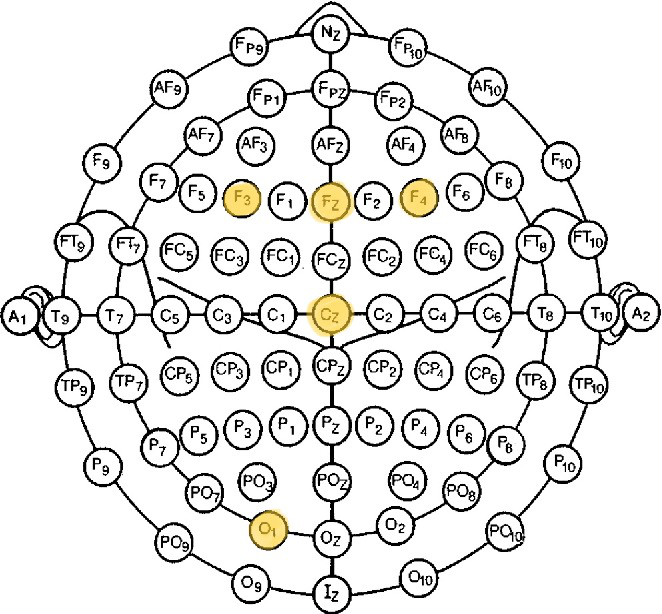

In [7]:
'''Load image of the location of channels that we are using '''
from PIL import Image

image = Image.open("Map.jpeg")
image.show()

# Data Analysis & Results

### Descriptive Statistics - Mean Raw Signal

The following function take in a dataframe of EEG data and a list of channels then returns an average array per channel. Then the second function will loop thorugh two signals for each channel and plot the average frequency.

In [8]:
"Function that creates an array that contains the average signal for each channel in ch_names in df "
def avg_signal(df,ch_names):
    
    avg_array = []
    
    for i in range(len(ch_names)):
        
        avg_ch = []
        ch = df.loc[ch_names[i]]
        
        for i in range(np.shape(sch)[1]-1):
            avg_ch.append(np.mean(ch[i]))
            
        avg_ch = np.array(avg_ch)
        avg_array.append(avg_ch)
        
        
    return avg_array

" Function to plot each avergae signal given in array format "

#https://raphaelvallat.com/bandpower.html

def plot_avg_signals(signal_arr1,signal_arr2,title1,title2,freq1,freq2): 
    sns.set(font_scale = 1.2)

    for i in range(len(signal_arr1)):
    
        time1 = np.arange(signal_arr1[i].size) / freq1
        time2 = np.arange(signal_arr2[i].size) / freq2
        
        
        if freq1 > freq2:
            time = time1
        else:
            time = time2

        
        # Plot the signal
        fig, ax = plt.subplots(1, 1, figsize=(12, 4))
        plt.plot(time1, signal_arr1[i], lw=1.5, color='c')
        plt.plot(time2, signal_arr2[i], lw=1.5, color='m') 
        plt.xlabel('Time (seconds)')
        plt.xlim([time.min(), time.max()])
        plt.title('Average ' + ch_names[i])
        plt.legend([title1,title2])
        sns.despine()

The following is the average raw signal for each of the five channels   ["Cz","F4","O1","F3","Fz"]

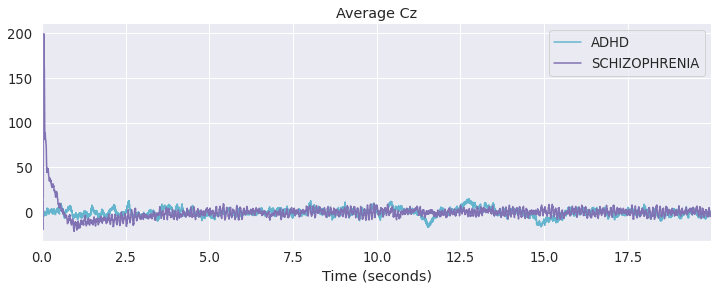

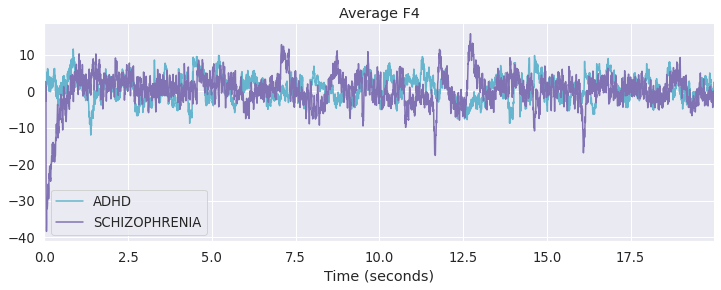

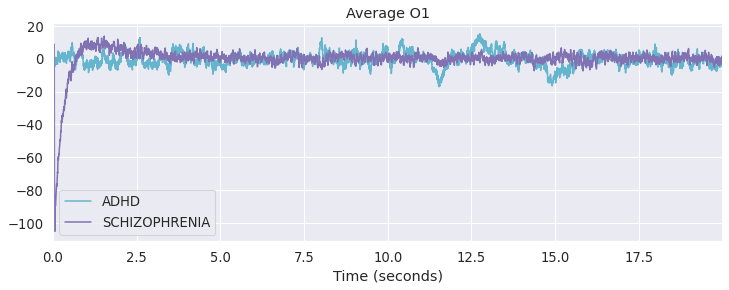

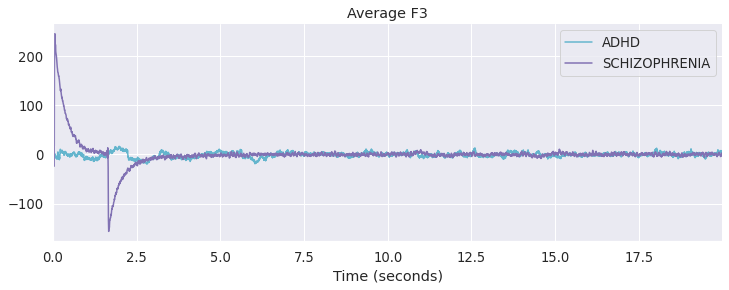

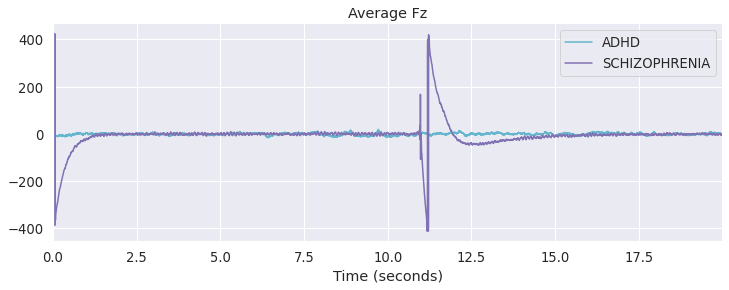

In [9]:
# Plot average signals for each channel 

ch_names = ["Cz","F4","O1","F3","Fz"]

sch_avg = avg_signal(sch,ch_names)
avg_adhd = avg_signal(adhd_bigdf,ch_names)

plot_avg_signals(avg_adhd,sch_avg,"ADHD","SCHIZOPHRENIA",256,250)

### Power Spectrum Analysis

Now we plan to apply the fourier transform to visualize a spectral density plot to analyze which frequencies have the highest/lowest power.

In [10]:
def plot_feq_pw(signal_arr1,signal_arr2,title1,title2,freq_sam,freq2_sam,min_freq,max_freq): 
    sns.set(font_scale = 1.2)
       
        
        
    for i in range(len(signal_arr1)):
        
        bins = []
        pws = []
        
        for j in range(2):
            
            signals = [signal_arr1,signal_arr2]
            freqs = [freq_sam,freq2_sam]
    
            egg_signal = signals[j][i]
            fft_result = fft.rfft(egg_signal)
            sampling_rate = freqs[j]
            bin_frequencies = fft.rfftfreq(len(egg_signal), d=1/sampling_rate)
            max_magnitude_index = np.argmax(np.abs(fft_result))
            max_frequency = bin_frequencies[max_magnitude_index]
            power_spectrum = np.abs(fft_result)**2
            
            bins.append(bin_frequencies)
            pws.append(power_spectrum)

            
        # Plot the signal
        fig, ax = plt.subplots(1, 1, figsize=(12, 4))
        plt.plot(bins[0], pws[0], lw=1.5, color='c')
        plt.plot(bins[1], pws[1], lw=1.5, color='m')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.xlim(min_freq, max_freq) 
        plt.title('Power Spectrum of Average ' + ch_names[i])
        plt.legend([title1,title2])
        sns.despine()

For each electrode looking at the power across all frequencies 

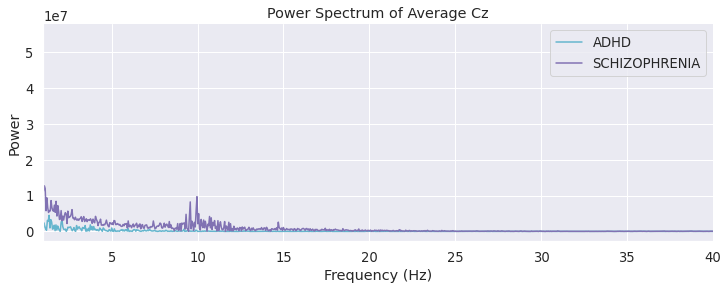

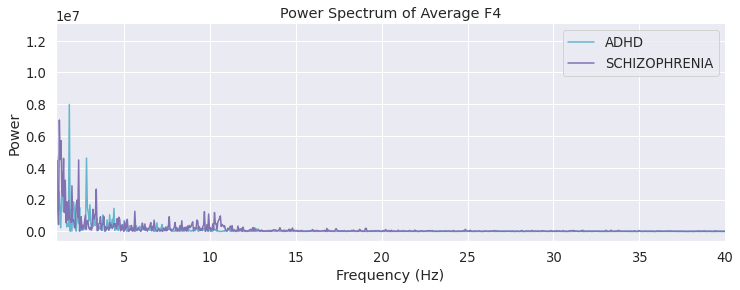

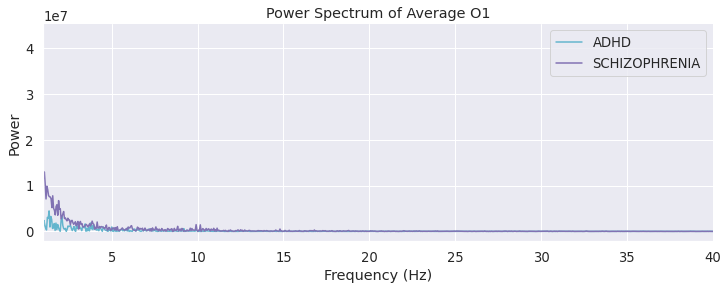

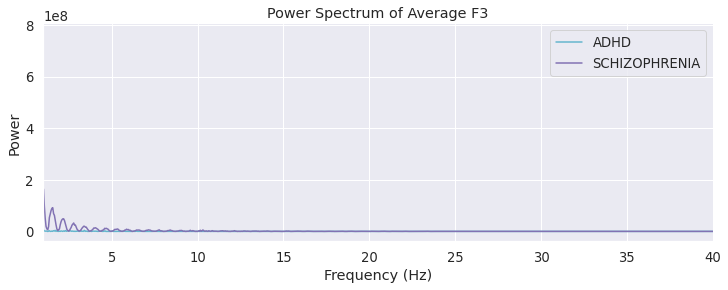

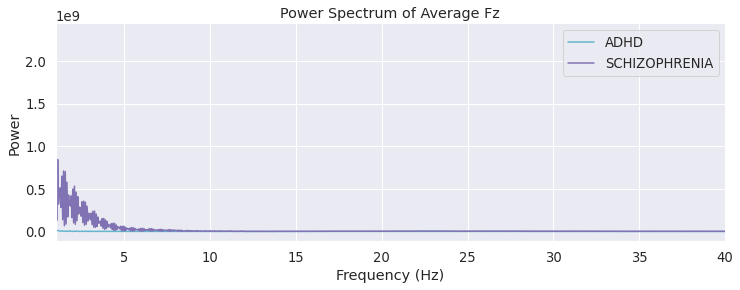

In [11]:
plot_feq_pw(avg_adhd,sch_avg,"ADHD","SCHIZOPHRENIA",256,250, 1,40)

Looking closer at Delta (1- 4Hz) and Theta (4- 8Hz)

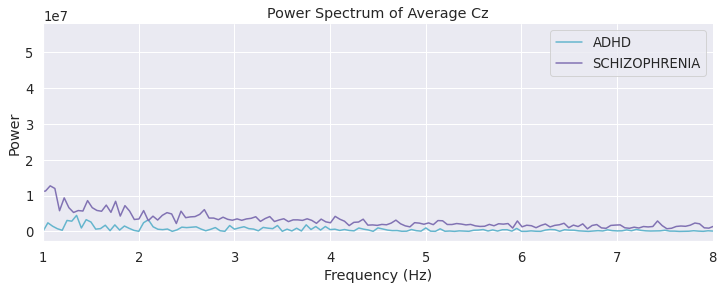

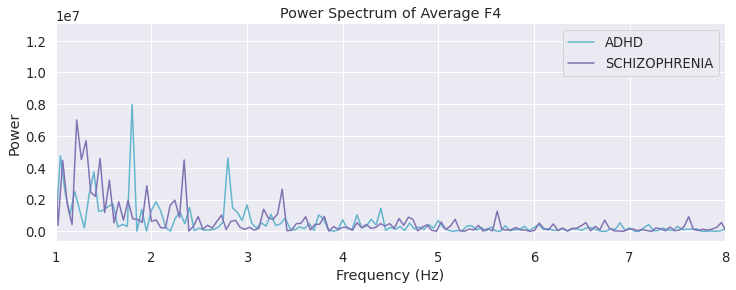

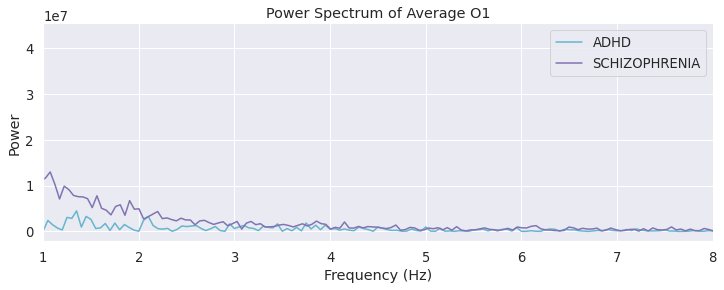

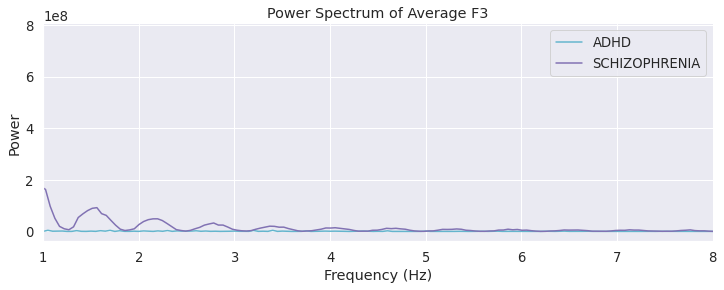

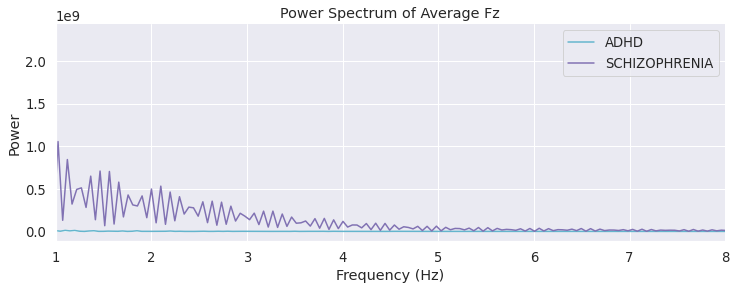

In [12]:
plot_feq_pw(avg_adhd,sch_avg,"ADHD","SCHIZOPHRENIA",256,250, 1,8)

### Predictive Models

SVM Classifier

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def extract_features(df, ch_names):
    feature_df = pd.DataFrame()
    for ch in ch_names:
        ch_data = df.loc[ch]
        # Exclude the last entry (assumed to be 'cell' or similar text metadata)
        if isinstance(ch_data, pd.Series) and ch_data.index[-1] == 'cell':
            ch_data = ch_data.iloc[:-1]

        # Flatten the DataFrame if necessary
        if isinstance(ch_data, pd.DataFrame):
            ch_data = ch_data.values.flatten()

        # Convert to numeric
        ch_data = pd.to_numeric(ch_data, errors='coerce')

        # Drop NaN values
        ch_data = ch_data[~np.isnan(ch_data)]  

        # Compute features for each channel
        mean = np.mean(ch_data)
        std = np.std(ch_data)
        feature_df[ch+'_mean'] = [mean]
        feature_df[ch+'_std'] = [std]
    return feature_df


# Prepare the data for SVM
adhd_features = pd.concat([extract_features(df, ch_names) for df in adhd_dfs_list])
adhd_features['label'] = 'ADHD'

sch_features = pd.concat([extract_features(df, ch_names) for df in sch_dfs])
sch_features['label'] = 'Schizophrenia'

# Combine ADHD and Schizophrenia data
data = pd.concat([adhd_features, sch_features])

# Preprocess the data
X = data.drop(['label'], axis=1)
y = data['label']
X = preprocessing.scale(X)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=80)


# Train the SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

# Test the SVM
y_pred = clf.predict(X_test)

# Evaluate the SVM's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7872340425531915
               precision    recall  f1-score   support

         ADHD       0.84      0.89      0.86        35
Schizophrenia       0.60      0.50      0.55        12

     accuracy                           0.79        47
    macro avg       0.72      0.69      0.70        47
 weighted avg       0.78      0.79      0.78        47



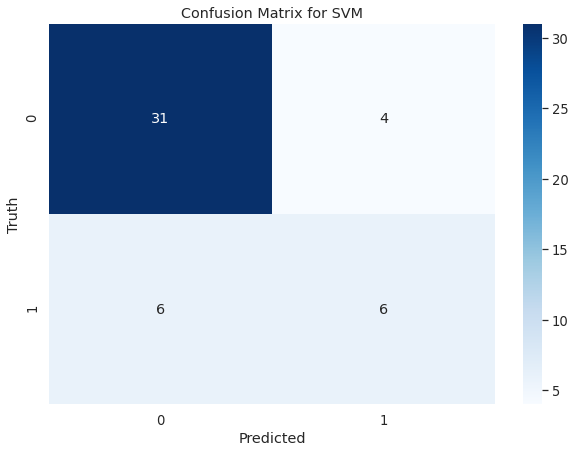

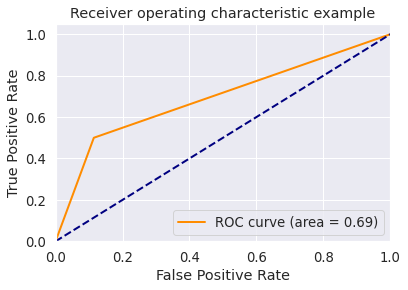

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Generate a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM')
plt.show()

# Generate a ROC curve
# Note: this assumes 'ADHD' is the positive class. If 'Schizophrenia' is the positive class, swap 'ADHD' and 'Schizophrenia' below.
y_bin = label_binarize(y_test, classes=['ADHD', 'Schizophrenia'])
y_pred_bin = label_binarize(y_pred, classes=['ADHD', 'Schizophrenia'])
fpr, tpr, thresholds = roc_curve(y_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Save the column names first
features = data.drop(['label'], axis=1).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#clf = RandomForestClassifier(n_estimators=60, random_state=34)

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Use cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy for each fold
print("Scores:", scores)

# And the mean accuracy of all 5 folds
print("Mean:", scores.mean())

# evaluate the performance of your model on the test set
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Scores: [1.  1.  0.8 0.8 0.7]
Mean: 0.86
Accuracy: 0.9090909090909091
               precision    recall  f1-score   support

         ADHD       1.00      0.86      0.92         7
Schizophrenia       0.80      1.00      0.89         4

     accuracy                           0.91        11
    macro avg       0.90      0.93      0.91        11
 weighted avg       0.93      0.91      0.91        11



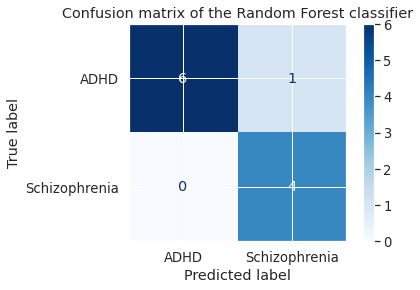

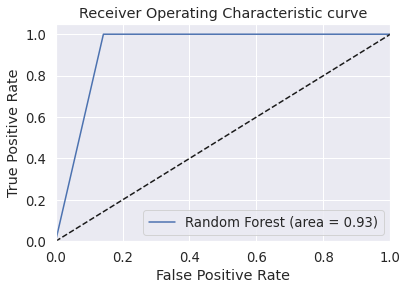

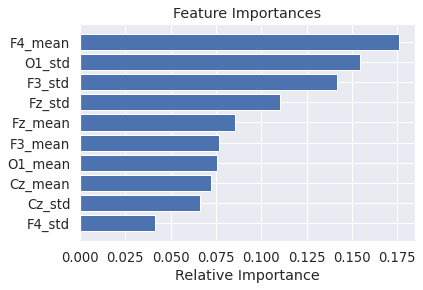

Feature: Cz_mean, Score: 0.07246795671095416
Feature: Cz_std, Score: 0.06609291189876666
Feature: F4_mean, Score: 0.17575592382674238
Feature: F4_std, Score: 0.04141734049019861
Feature: O1_mean, Score: 0.07544295591681044
Feature: O1_std, Score: 0.15430390137376712
Feature: F3_mean, Score: 0.07693988179475125
Feature: F3_std, Score: 0.14178493045569018
Feature: Fz_mean, Score: 0.08545071808828425
Feature: Fz_std, Score: 0.11034347944403501


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# Plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the Random Forest classifier')
plt.show()

# Calculate the ROC curve and ROC AUC for each class
# First, recode labels to be 0 or 1
le = LabelEncoder()
y_test_bin = le.fit_transform(y_test)
y_pred_bin = le.transform(y_pred)

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Show feature importances
#features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

for feature, importance in zip(features, feature_importances):
    print(f'Feature: {feature}, Score: {importance}')

# Conclusion & Discussion

* Our research demonstrates that it is possible to use EEG data to distinguish between different psychiatric disorders, especially schizophrenia. However, due to the incomplete accuracy in the predictive capability of our models, it should not be the only diagnostic tool.
* Ideally, our predictive model would be able to distinguish between healthy patients and schizophrenic patients, however, due to limitations in available data, we were unable to find a comparable control dataset.
* Further studies that collect even more EEG data would help further this area of research.
* The lack of diagnostic capability of an EEG model is consistent with current literature, and further study is needed to improve EEG models. A study of the accuracy of a combination of EEG models with current diagnostic tools for psychiatric disorders would likely help create even more accurate tools for diagnosing patients. 